<a href="https://colab.research.google.com/github/nondeterministicNilu/Niladri/blob/master/upvotePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv('/content/train_NIR5Yl1.csv')
df.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [3]:
df1=pd.read_csv('/content/test_8i3B3FC.csv')
df1.head()

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0


In [4]:
print(len(df), len(df1))

330045 141448


In [5]:
df.isnull().sum()

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
Upvotes       0
dtype: int64

In [6]:
df.isna().sum()

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
Upvotes       0
dtype: int64

In [7]:
len(set(df['ID']))/len(df)

1.0

So, this above experiment shows that the section ID is really not important for our data, as all the IDs are distinct for each data

In [8]:
len(set(df1['ID']))/len(df1)

1.0

In [9]:
print(set(df['Tag']),'\n', set(df1['Tag']))

{'r', 'h', 'p', 'o', 'a', 'j', 's', 'i', 'x', 'c'} 
 {'h', 'r', 'p', 'o', 'i', 'a', 's', 'j', 'x', 'c'}


In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['TagEncoded1']=le.fit_transform(df['Tag'])
df1['TagEncoded1']=le.fit_transform(df1['Tag'])

In [11]:
df.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes,TagEncoded1
0,52664,a,3942.0,2.0,155623,7855.0,42.0,0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0,0
2,468453,c,1358.0,4.0,56177,8067.0,60.0,1
3,96996,a,264.0,3.0,168793,27064.0,9.0,0
4,131465,c,4271.0,4.0,112223,13986.0,83.0,1


In [12]:
df1.head()

,ID,Tag,Reputation,Answers,Username,Views,TagEncoded1
0,366953,a,5645.0,3.0,50652,33200.0,0
1,71864,c,24511.0,6.0,37685,2730.0,1
2,141692,i,927.0,1.0,135293,21167.0,3
3,316833,i,21.0,6.0,166998,18528.0,3
4,440445,i,4475.0,10.0,53504,57240.0,3


In [13]:
print(set(df['Tag']),'\n', set(df['TagEncoded1']), '\n\n', set(df1['Tag']),'\n', set(df1['TagEncoded1']))

{'r', 'h', 'p', 'o', 'a', 'j', 's', 'i', 'x', 'c'} 
 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9} 

 {'h', 'r', 'p', 'o', 'i', 'a', 's', 'j', 'x', 'c'} 
 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [14]:
X=df.drop(['ID', 'Tag', 'Upvotes'], axis=1)
Y=df['Upvotes']
X.head()

,Reputation,Answers,Username,Views,TagEncoded1
0,3942.0,2.0,155623,7855.0,0
1,26046.0,12.0,21781,55801.0,0
2,1358.0,4.0,56177,8067.0,1
3,264.0,3.0,168793,27064.0,0
4,4271.0,4.0,112223,13986.0,1


In [15]:
Y

0           42.0
1         1175.0
2           60.0
3            9.0
4           83.0
           ...  
330040       0.0
330041      73.0
330042      15.0
330043       3.0
330044      37.0
Name: Upvotes, Length: 330045, dtype: float64

In [16]:
len(Y)

330045

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
y_pred = reg.predict(X_test)

In [19]:
reg.coef_

array([ 3.43954166e-02, -3.81877388e+01, -2.81654996e-04,  2.01499198e-02,
        7.04051673e+00])

In [20]:
reg.intercept_

-378.95524403415067

In [21]:
from sklearn.metrics import r2_score, mean_squared_error
r2=r2_score(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print(r2,'\n', rmse)

0.30393297979971445 
 2330.5069059753505


In [22]:
predictors=X_train.columns
predictors

Index(['Reputation', 'Answers', 'Username', 'Views', 'TagEncoded1'], dtype='object')

In [23]:
reg.fit(X_train,y_train)
coef=pd.Series(reg.coef_,predictors).sort_values()
coef

Answers       -38.187739
Username       -0.000282
Views           0.020150
Reputation      0.034395
TagEncoded1     7.040517
dtype: float64

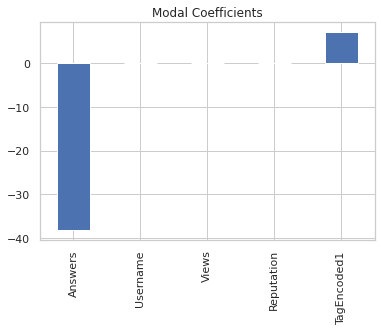

In [24]:
coef.plot(kind='bar',title='Modal Coefficients')

In [25]:
from sklearn.linear_model import Ridge

In [26]:
ridgeReg = Ridge(alpha=0.05,normalize=True)
ridgeReg.fit(X_train,y_train)
y_pred_rig=ridgeReg.predict(X_test)

In [27]:
ridgeReg.coef_

array([ 3.27562099e-02, -2.15934694e+01, -2.85259222e-04,  1.88694100e-02,
        7.31089028e+00])

In [28]:
ridgeReg.intercept_

-393.81381650317593

In [29]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred_rig))
r2=r2_score(y_test,y_pred_rig)
print(r2,rmse)

0.306643925281058 2325.9642107397804


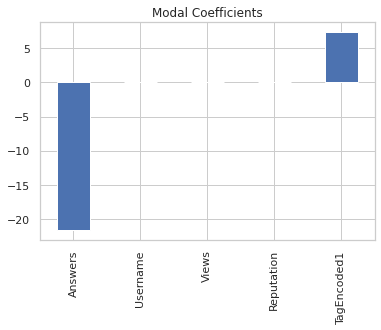

In [30]:
coef=pd.Series(ridgeReg.coef_,predictors).sort_values()
coef.plot(kind='bar',title='Modal Coefficients')

In [31]:
from sklearn.linear_model import  Lasso
lassoReg=Lasso(alpha=0.01, normalize=True)
lassoReg.fit(X_train,y_train)
y_pred_lso=lassoReg.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test,y_pred_lso))
r2=r2_score(y_test,y_pred_lso)
print(r2,rmse)

0.30426290125326105 2329.9545343401273


In [32]:
dfm=pd.DataFrame(columns=['Linear Reg','Ridge Reg','Lasso Reg'])
for i in range(len(ridgeReg.coef_)):
  dfm=dfm.append({'Linear Reg':reg.coef_[i],'Ridge Reg':ridgeReg.coef_[i],'Lasso Reg':lassoReg.coef_[i]},ignore_index=True)
dfm

,Linear Reg,Ridge Reg,Lasso Reg
0,0.034395,0.032756,0.034197
1,-38.187739,-21.593469,-35.306070
2,-0.000282,-0.000285,-0.000178
3,0.020150,0.018869,0.020027
4,7.040517,7.310890,5.128708


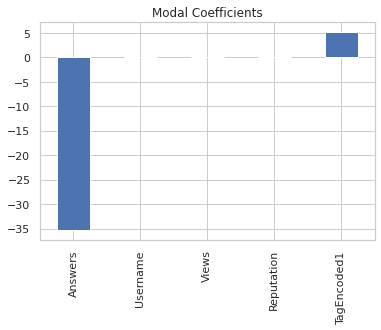

In [33]:
coef=pd.Series(lassoReg.coef_,predictors).sort_values()
coef.plot(kind='bar',title='Modal Coefficients')

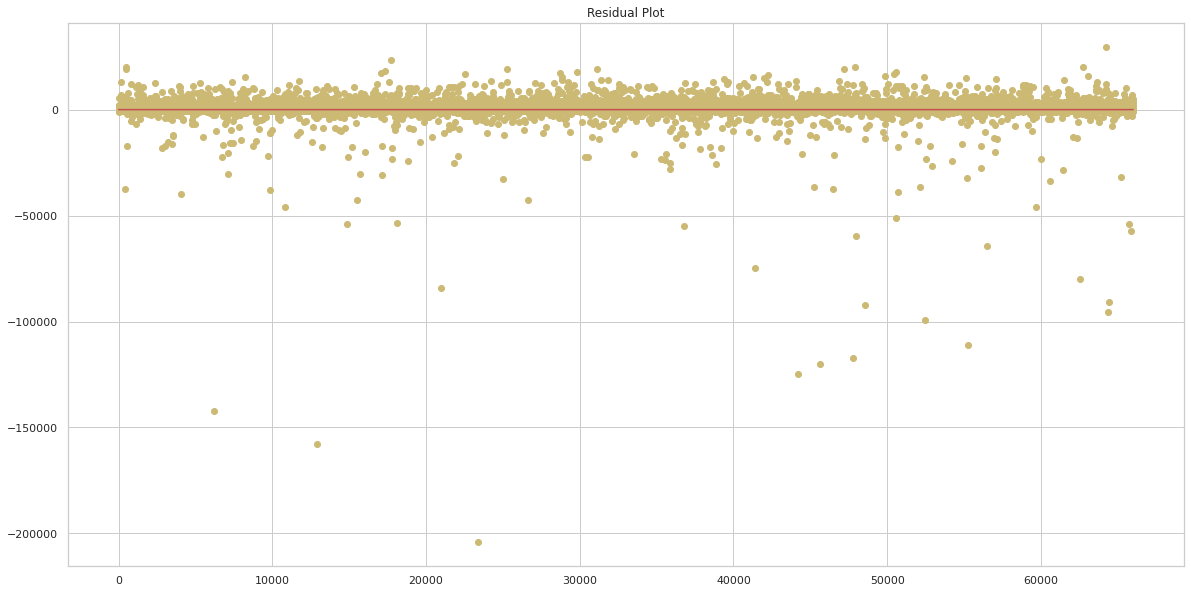

In [34]:
x=[i for i in range(1,len(y_pred)+1)]

fig= plt.figure(figsize=(20,10))
x_plot=plt.scatter(x,(y_pred_rig-y_test),c='y')
plt.plot(x,[0]*len(y_pred),c='r')
plt.title("Residual Plot")
plt.show()

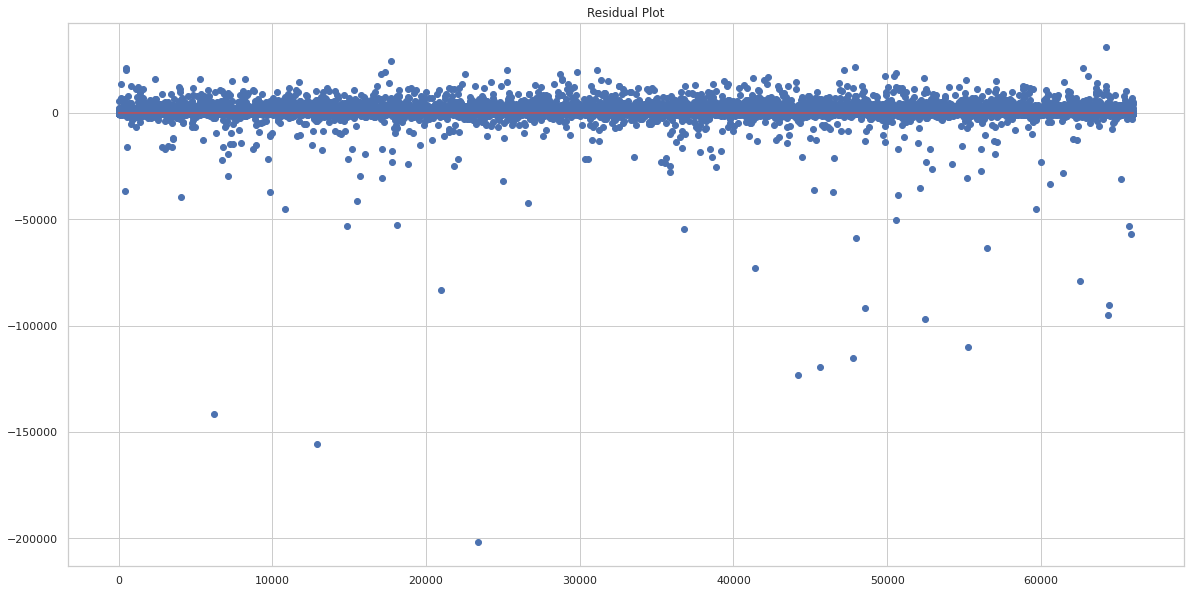

In [35]:
x=[i for i in range(1,len(y_pred)+1)]

fig= plt.figure(figsize=(20,10))
x_plot=plt.scatter(x,(y_pred_lso-y_test),c='b')
plt.plot(x,[0]*len(y_pred),c='r')
plt.title("Residual Plot")
plt.show()

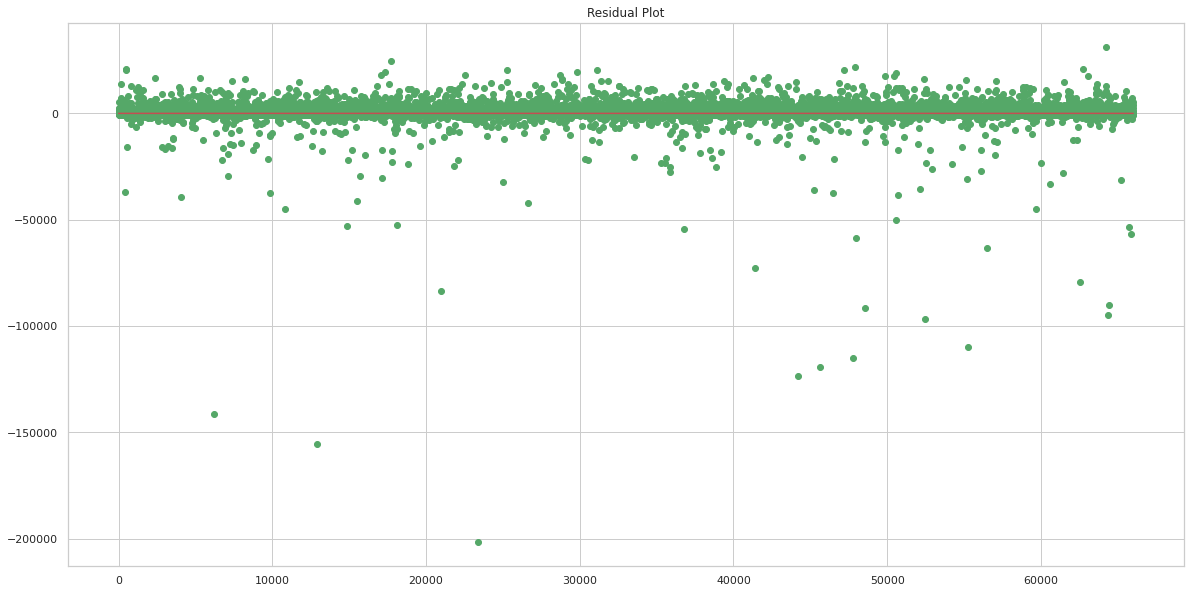

In [36]:
x=[i for i in range(1,len(y_pred)+1)]

fig= plt.figure(figsize=(20,10))
x_plot=plt.scatter(x,(y_pred-y_test),c='g')
plt.plot(x,[0]*len(y_pred),c='r')
plt.title("Residual Plot")
plt.show()

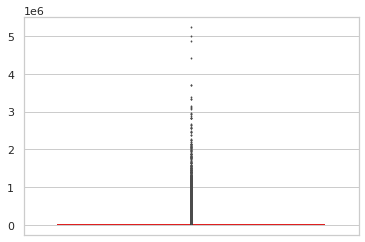

In [37]:
sns.boxplot(x=X, color='red',width=0.8, orient='v', linewidth=0, fliersize=1)

In [38]:
Y.fillna(method='ffill')

0           42.0
1         1175.0
2           60.0
3            9.0
4           83.0
           ...  
330040       0.0
330041      73.0
330042      15.0
330043       3.0
330044      37.0
Name: Upvotes, Length: 330045, dtype: float64

In [39]:
Y.isna().sum()

0

In [40]:
type(Y)
y1=pd.DataFrame(Y)
y1.head()

,Upvotes
0,42.0
1,1175.0
2,60.0
3,9.0
4,83.0


In [41]:
Z=pd.DataFrame()
Z=X
# Z.append(Y)
Z.head()

,Reputation,Answers,Username,Views,TagEncoded1
0,3942.0,2.0,155623,7855.0,0
1,26046.0,12.0,21781,55801.0,0
2,1358.0,4.0,56177,8067.0,1
3,264.0,3.0,168793,27064.0,0
4,4271.0,4.0,112223,13986.0,1


In [42]:
Z=pd.concat([Z,y1],axis=1)

In [43]:
Z.head()

,Reputation,Answers,Username,Views,TagEncoded1,Upvotes
0,3942.0,2.0,155623,7855.0,0,42.0
1,26046.0,12.0,21781,55801.0,0,1175.0
2,1358.0,4.0,56177,8067.0,1,60.0
3,264.0,3.0,168793,27064.0,0,9.0
4,4271.0,4.0,112223,13986.0,1,83.0


In [44]:
from scipy import stats
z = np.abs(stats.zscore(Z))
print(z)

[[0.14157253 0.53573597 1.5072655  0.26915833 1.42067741 0.08225766]
 [0.67523751 2.25794312 1.21226978 0.32308687 1.42067741 0.23312725]
 [0.23705919 0.02299985 0.51337753 0.26653963 1.0197016  0.07724713]
 ...
 [0.05894553 0.53573597 0.20843454 0.33588566 1.0197016  0.08977345]
 [0.2839526  0.53573597 0.0243399  0.34015957 0.18322582 0.09311381]
 [0.21329838 0.02299985 1.48834852 0.33463807 0.18322582 0.08364947]]


In [45]:
Q1 = Z.quantile(0.48)
Q3 = Z.quantile(0.95)
IQR = Q3 - Q1
print(IQR)

Reputation      31104.0
Answers             7.0
Username        87992.0
Views          108479.8
TagEncoded1         4.0
Upvotes           934.0
dtype: float64


In [46]:
Z1=Z[(Z < (Q1 - 1.5 * IQR)) | (Z > (Q3 + 1.5 * IQR)) == True]

In [47]:
Z1.head()

,Reputation,Answers,Username,Views,TagEncoded1,Upvotes
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
len(Z1)

330045

In [49]:
for col in Z1.columns:
  Z2=Z[Z1[col].notna()==True]

In [50]:
Z2.head()

,Reputation,Answers,Username,Views,TagEncoded1,Upvotes
34,56188.0,7.0,122559,37549.0,0,2474.0
37,18404.0,13.0,73061,118423.0,2,2963.0
61,57914.0,5.0,63016,90861.0,1,4186.0
95,19027.0,41.0,23334,752007.0,4,12565.0
133,67157.0,2.0,100794,91080.0,2,3717.0


In [51]:
len(Z2)/len(Z)

0.022448453998697146

In [52]:
Z3=Z.drop(Z2.index)

In [53]:
Z3.head()

,Reputation,Answers,Username,Views,TagEncoded1,Upvotes
0,3942.0,2.0,155623,7855.0,0,42.0
1,26046.0,12.0,21781,55801.0,0,1175.0
2,1358.0,4.0,56177,8067.0,1,60.0
3,264.0,3.0,168793,27064.0,0,9.0
4,4271.0,4.0,112223,13986.0,1,83.0


In [54]:
len(Z)-len(Z2)-len(Z3)

0

In [55]:
X=Z3.drop('Upvotes',axis=1)
Y=Z3['Upvotes']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
y_pred = reg.predict(X_test)

In [57]:
reg.coef_

array([ 5.22249356e-03,  1.12649048e+01, -1.56373024e-04,  2.31328981e-03,
       -1.03867349e+00])

In [58]:
reg.intercept_

9.478077737497557

In [59]:
from sklearn.metrics import r2_score, mean_squared_error
r2=r2_score(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print(r2,'\n', rmse)

0.37573419442458655 
 224.57704535253254


In [60]:
predictors=X_train.columns
predictors

Index(['Reputation', 'Answers', 'Username', 'Views', 'TagEncoded1'], dtype='object')

In [61]:
reg.fit(X_train,y_train)
coef=pd.Series(reg.coef_,predictors).sort_values()
coef

TagEncoded1    -1.038673
Username       -0.000156
Views           0.002313
Reputation      0.005222
Answers        11.264905
dtype: float64

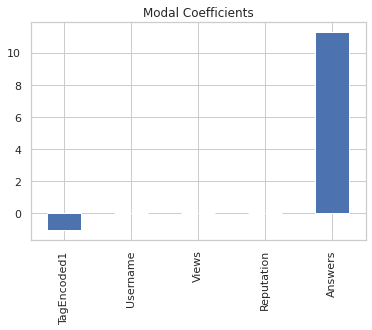

In [62]:
coef.plot(kind='bar',title='Modal Coefficients')

In [63]:
from sklearn.linear_model import Ridge

In [64]:
ridgeReg = Ridge(alpha=0.05,normalize=True)
ridgeReg.fit(X_train,y_train)
y_pred_rig=ridgeReg.predict(X_test)

In [65]:
ridgeReg.coef_

array([ 4.96029754e-03,  1.16376633e+01, -1.51739312e-04,  2.18732306e-03,
       -1.06627662e+00])

In [66]:
ridgeReg.intercept_

12.516878661469093

In [67]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred_rig))
r2=r2_score(y_test,y_pred_rig)
print(r2,rmse)

0.3746315415381305 224.7752952589711


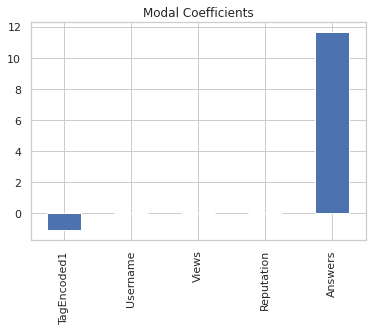

In [68]:
coef=pd.Series(ridgeReg.coef_,predictors).sort_values()
coef.plot(kind='bar',title='Modal Coefficients')

In [69]:
from sklearn.linear_model import  Lasso
lassoReg=Lasso(alpha=0.01, normalize=True)
lassoReg.fit(X_train,y_train)
y_pred_lso=lassoReg.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test,y_pred_lso))
r2=r2_score(y_test,y_pred_lso)
print(r2,rmse)

0.37452848760291335 224.79381476070498


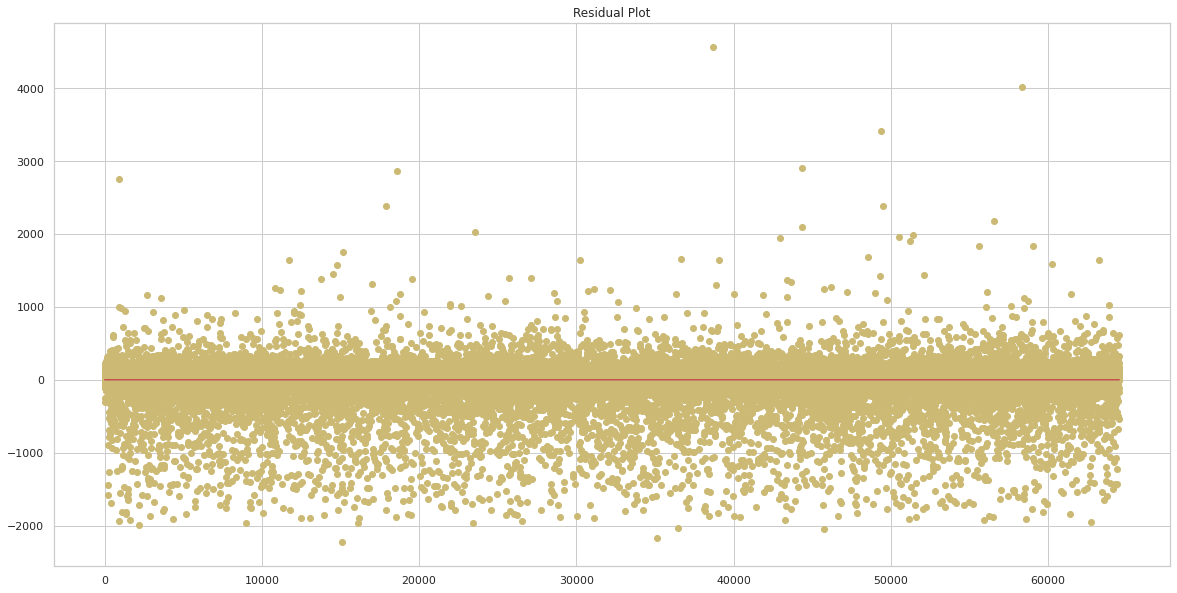

In [70]:
x=[i for i in range(1,len(y_pred)+1)]

fig= plt.figure(figsize=(20,10))
x_plot=plt.scatter(x,(y_pred_rig-y_test),c='y')
plt.plot(x,[0]*len(y_pred),c='r')
plt.title("Residual Plot")
plt.show()

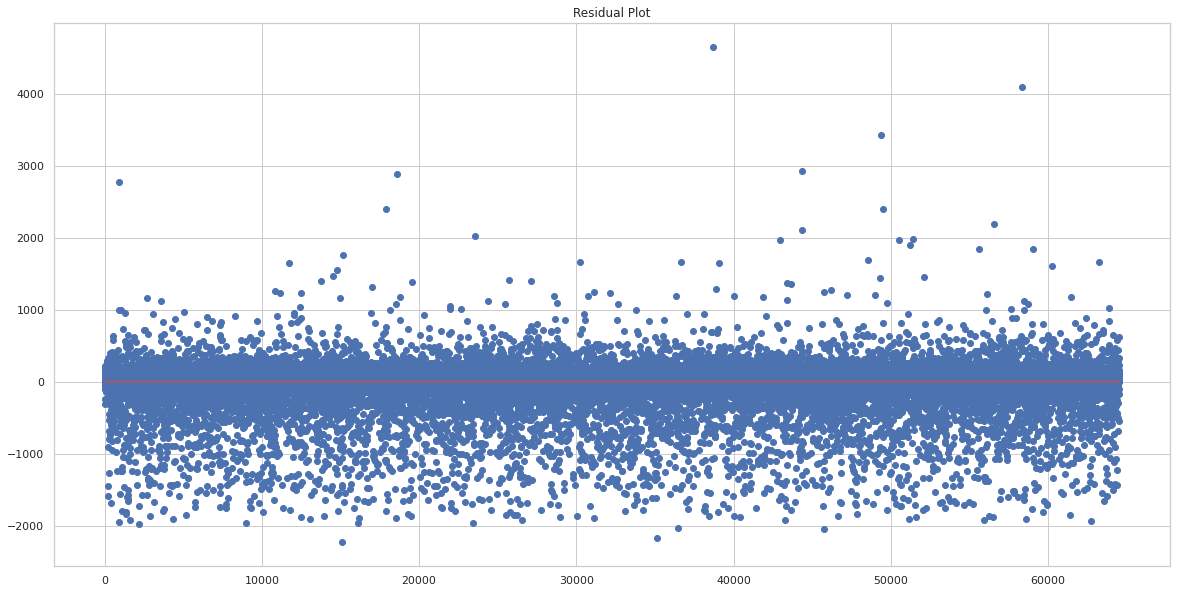

In [71]:
x=[i for i in range(1,len(y_pred)+1)]

fig= plt.figure(figsize=(20,10))
x_plot=plt.scatter(x,(y_pred_lso-y_test),c='b')
plt.plot(x,[0]*len(y_pred),c='r')
plt.title("Residual Plot")
plt.show()

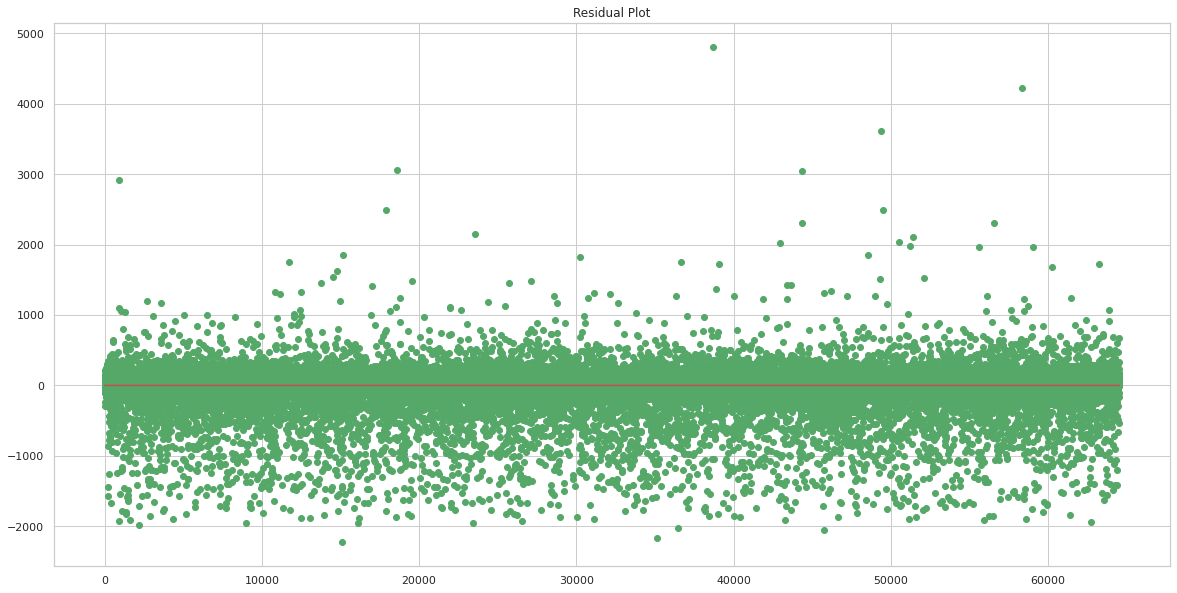

In [72]:
x=[i for i in range(1,len(y_pred)+1)]

fig= plt.figure(figsize=(20,10))
x_plot=plt.scatter(x,(y_pred-y_test),c='g')
plt.plot(x,[0]*len(y_pred),c='r')
plt.title("Residual Plot")
plt.show()

In [73]:
df.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes,TagEncoded1
0,52664,a,3942.0,2.0,155623,7855.0,42.0,0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0,0
2,468453,c,1358.0,4.0,56177,8067.0,60.0,1
3,96996,a,264.0,3.0,168793,27064.0,9.0,0
4,131465,c,4271.0,4.0,112223,13986.0,83.0,1


In [74]:
len(set(df['Username']))

141802

In [75]:
df_1=df.drop(['Tag', 'ID'], axis=1)
df_1.head()

,Reputation,Answers,Username,Views,Upvotes,TagEncoded1
0,3942.0,2.0,155623,7855.0,42.0,0
1,26046.0,12.0,21781,55801.0,1175.0,0
2,1358.0,4.0,56177,8067.0,60.0,1
3,264.0,3.0,168793,27064.0,9.0,0
4,4271.0,4.0,112223,13986.0,83.0,1


In [76]:
from scipy import stats
df_corr = pd.DataFrame()
df_p = pd.DataFrame() 
col=df_1.columns 
for x in col:
    for y in col:
        corr = stats.pearsonr(df_1[x], df_1[y])
        df_corr.loc[x,y] = corr[0]
        df_p.loc[x,y] = corr[1]

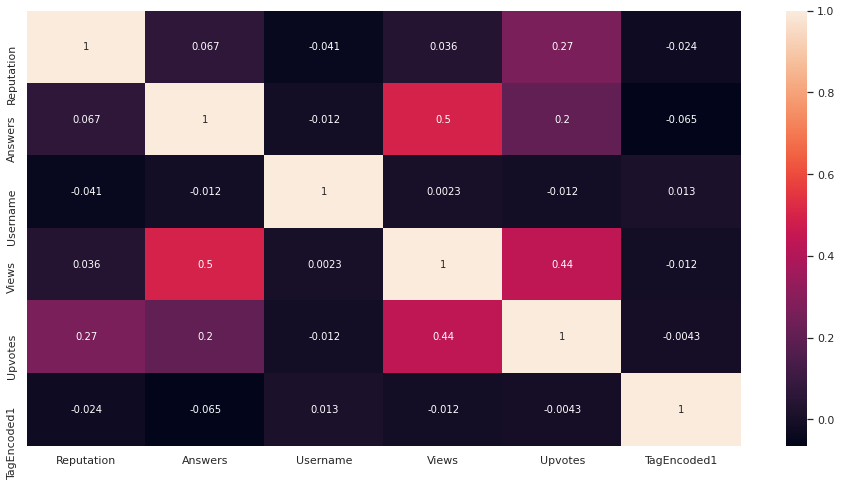

In [77]:
plt.figure(figsize=(16,8))
sns.heatmap(df_corr,annot=True)

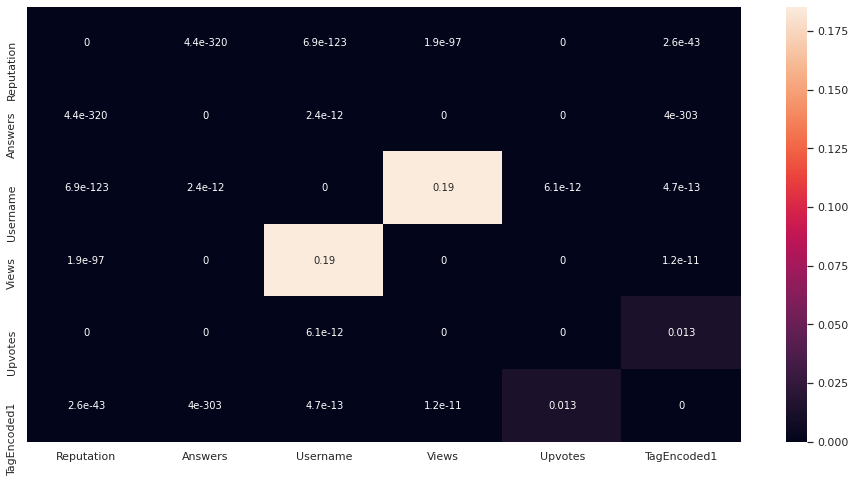

In [78]:
plt.figure(figsize=(16,8))
sns.heatmap(df_p,annot=True)

In [79]:
df_corr

,Reputation,Answers,Username,Views,Upvotes,TagEncoded1
Reputation,1.000000,0.066504,-0.041019,0.036455,0.266710,-0.024017
Answers,0.066504,1.000000,-0.012197,0.498642,0.202033,-0.064710
Username,-0.041019,-0.012197,1.000000,0.002306,-0.011970,0.012590
Views,0.036455,0.498642,0.002306,1.000000,0.437336,-0.011807
Upvotes,0.266710,0.202033,-0.011970,0.437336,1.000000,-0.004300
TagEncoded1,-0.024017,-0.064710,0.012590,-0.011807,-0.004300,1.000000


In [80]:
df_p

,Reputation,Answers,Username,Views,Upvotes,TagEncoded1
Reputation,0.000000e+00,4.385327e-320,6.921911e-123,1.861188e-97,0.000000e+00,2.556954e-43
Answers,4.385327e-320,0.000000e+00,2.424033e-12,0.000000e+00,0.000000e+00,3.967799e-303
Username,6.921911e-123,2.424033e-12,0.000000e+00,1.853118e-01,6.116990e-12,4.718945e-13
Views,1.861188e-97,0.000000e+00,1.853118e-01,0.000000e+00,0.000000e+00,1.175963e-11
Upvotes,0.000000e+00,0.000000e+00,6.116990e-12,0.000000e+00,0.000000e+00,1.349020e-02
TagEncoded1,2.556954e-43,3.967799e-303,4.718945e-13,1.175963e-11,1.349020e-02,0.000000e+00


In [81]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

dfv=df_1[col]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfv.values, i) for i in range(dfv.shape[1])]
vif["features"] = dfv.columns
vif

,VIF Factor,features
0,1.164594,Reputation
1,2.418281,Answers
2,2.332168,Username
3,1.805658,Views
4,1.352087,Upvotes
5,2.119539,TagEncoded1


In [82]:
df_2=df_1.drop('Username',axis=1)
df_2.head()

,Reputation,Answers,Views,Upvotes,TagEncoded1
0,3942.0,2.0,7855.0,42.0,0
1,26046.0,12.0,55801.0,1175.0,0
2,1358.0,4.0,8067.0,60.0,1
3,264.0,3.0,27064.0,9.0,0
4,4271.0,4.0,13986.0,83.0,1


In [83]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

dfv=df_2[df_2.columns]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfv.values, i) for i in range(dfv.shape[1])]
vif["features"] = dfv.columns
vif

,VIF Factor,features
0,1.161841,Reputation
1,2.124987,Answers
2,1.802595,Views
3,1.350038,Upvotes
4,1.528778,TagEncoded1


In [84]:
from scipy import stats
df_corr = pd.DataFrame()
df_p = pd.DataFrame() 
col=df_2.columns 
for x in col:
    for y in col:
        corr = stats.pearsonr(df_2[x], df_2[y])
        df_corr.loc[x,y] = corr[0]
        df_p.loc[x,y] = corr[1]

In [85]:
df_corr

,Reputation,Answers,Views,Upvotes,TagEncoded1
Reputation,1.000000,0.066504,0.036455,0.266710,-0.024017
Answers,0.066504,1.000000,0.498642,0.202033,-0.064710
Views,0.036455,0.498642,1.000000,0.437336,-0.011807
Upvotes,0.266710,0.202033,0.437336,1.000000,-0.004300
TagEncoded1,-0.024017,-0.064710,-0.011807,-0.004300,1.000000


In [86]:
df_p

,Reputation,Answers,Views,Upvotes,TagEncoded1
Reputation,0.000000e+00,4.385327e-320,1.861188e-97,0.00000,2.556954e-43
Answers,4.385327e-320,0.000000e+00,0.000000e+00,0.00000,3.967799e-303
Views,1.861188e-97,0.000000e+00,0.000000e+00,0.00000,1.175963e-11
Upvotes,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,1.349020e-02
TagEncoded1,2.556954e-43,3.967799e-303,1.175963e-11,0.01349,0.000000e+00


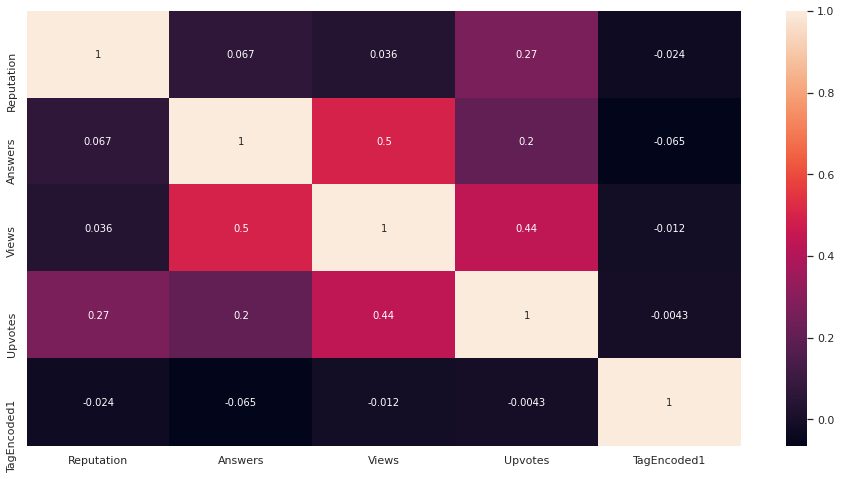

In [87]:
plt.figure(figsize=(16,8))
sns.heatmap(df_corr,annot=True)

In [88]:
X=df_2.drop( 'Upvotes', axis=1)
Y=df_2['Upvotes']
X.head()

,Reputation,Answers,Views,TagEncoded1
0,3942.0,2.0,7855.0,0
1,26046.0,12.0,55801.0,0
2,1358.0,4.0,8067.0,1
3,264.0,3.0,27064.0,0
4,4271.0,4.0,13986.0,1


In [89]:
Y

0           42.0
1         1175.0
2           60.0
3            9.0
4           83.0
           ...  
330040       0.0
330041      73.0
330042      15.0
330043       3.0
330044      37.0
Name: Upvotes, Length: 330045, dtype: float64

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
y_pred = reg.predict(X_test)

In [92]:
reg.coef_

array([ 3.44156389e-02, -3.81368177e+01,  2.01481608e-02,  6.99184281e+00])

In [93]:
reg.intercept_

-402.011351850861

In [94]:
from sklearn.metrics import r2_score, mean_squared_error
r2=r2_score(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print(r2,'\n', rmse)

0.30395436375873675 
 2330.4711078083


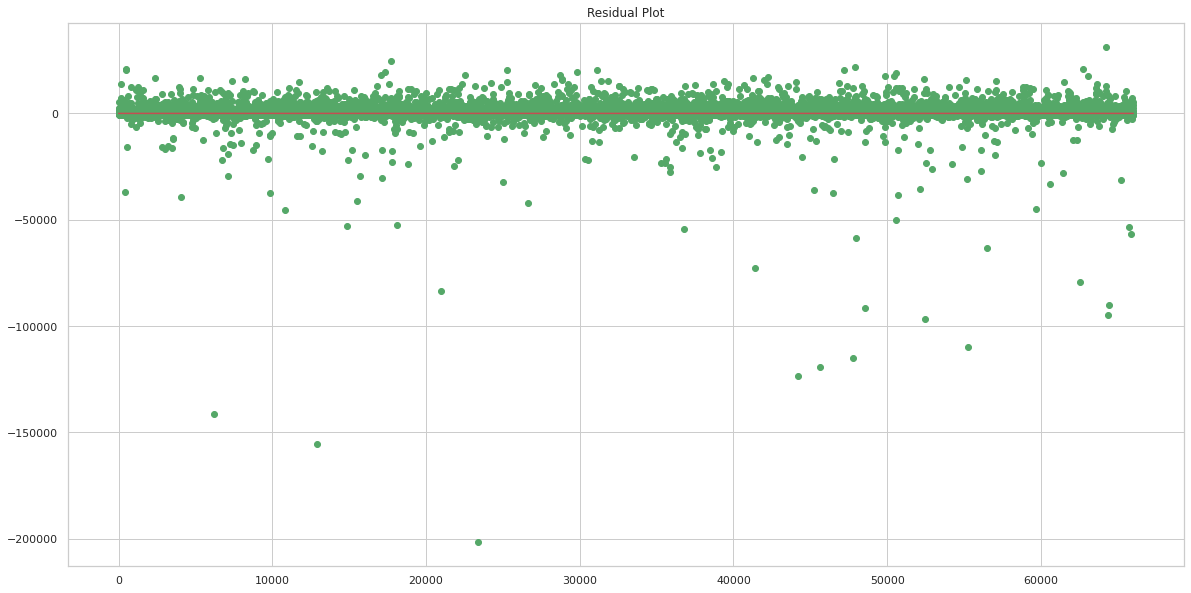

In [95]:
x=[i for i in range(1,len(y_pred)+1)]

fig= plt.figure(figsize=(20,10))
x_plot=plt.scatter(x,(y_pred-y_test),c='g')
plt.plot(x,[0]*len(y_pred),c='r')
plt.title("Residual Plot")
plt.show()

In [96]:
y1=pd.DataFrame(Y)
y1.head()

,Upvotes
0,42.0
1,1175.0
2,60.0
3,9.0
4,83.0


In [97]:
Z=pd.DataFrame()
Z=X
# Z.append(Y)
Z.head()

,Reputation,Answers,Views,TagEncoded1
0,3942.0,2.0,7855.0,0
1,26046.0,12.0,55801.0,0
2,1358.0,4.0,8067.0,1
3,264.0,3.0,27064.0,0
4,4271.0,4.0,13986.0,1


In [98]:
Z=pd.concat([Z,y1],axis=1)

In [99]:
Z.head()

,Reputation,Answers,Views,TagEncoded1,Upvotes
0,3942.0,2.0,7855.0,0,42.0
1,26046.0,12.0,55801.0,0,1175.0
2,1358.0,4.0,8067.0,1,60.0
3,264.0,3.0,27064.0,0,9.0
4,4271.0,4.0,13986.0,1,83.0


In [100]:
from scipy import stats
z = np.abs(stats.zscore(Z))
print(z)

[[0.14157253 0.53573597 0.26915833 1.42067741 0.08225766]
 [0.67523751 2.25794312 0.32308687 1.42067741 0.23312725]
 [0.23705919 0.02299985 0.26653963 1.0197016  0.07724713]
 ...
 [0.05894553 0.53573597 0.33588566 1.0197016  0.08977345]
 [0.2839526  0.53573597 0.34015957 0.18322582 0.09311381]
 [0.21329838 0.02299985 0.33463807 0.18322582 0.08364947]]


In [101]:
Q1 = Z.quantile(0.48)
Q3 = Z.quantile(0.95)
IQR = Q3 - Q1
print(IQR)

Reputation      31104.0
Answers             7.0
Views          108479.8
TagEncoded1         4.0
Upvotes           934.0
dtype: float64


In [102]:
Z1=Z[(Z < (Q1 - 1.5 * IQR)) | (Z > (Q3 + 1.5 * IQR)) == True]

In [103]:
for col in Z1.columns:
  Z2=Z[Z1[col].notna()==True]
Z2.head()

,Reputation,Answers,Views,TagEncoded1,Upvotes
34,56188.0,7.0,37549.0,0,2474.0
37,18404.0,13.0,118423.0,2,2963.0
61,57914.0,5.0,90861.0,1,4186.0
95,19027.0,41.0,752007.0,4,12565.0
133,67157.0,2.0,91080.0,2,3717.0


In [104]:
len(Z2)/len(Z)

0.022448453998697146

In [105]:
Z3=Z.drop(Z2.index)
Z3.head()

,Reputation,Answers,Views,TagEncoded1,Upvotes
0,3942.0,2.0,7855.0,0,42.0
1,26046.0,12.0,55801.0,0,1175.0
2,1358.0,4.0,8067.0,1,60.0
3,264.0,3.0,27064.0,0,9.0
4,4271.0,4.0,13986.0,1,83.0


In [106]:
X=Z3.drop('Upvotes',axis=1)
Y=Z3['Upvotes']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [107]:
y_pred = reg.predict(X_test)

In [108]:
reg.coef_

array([ 5.23919508e-03,  1.13035581e+01,  2.31017184e-03, -1.06963169e+00])

In [109]:
reg.intercept_

-3.3406041813947667

In [110]:
r2=r2_score(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print(r2,'\n', rmse)

0.37518838145993694 
 224.67520088211143


In [111]:
predictors=X_train.columns
predictors

Index(['Reputation', 'Answers', 'Views', 'TagEncoded1'], dtype='object')

In [112]:
reg.fit(X_train,y_train)
coef=pd.Series(reg.coef_,predictors).sort_values()
coef

TagEncoded1    -1.069632
Views           0.002310
Reputation      0.005239
Answers        11.303558
dtype: float64

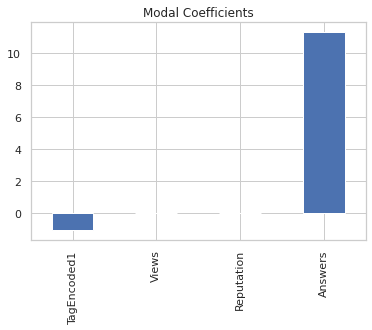

In [113]:
coef.plot(kind='bar',title='Modal Coefficients')

In [114]:
ridgeReg = Ridge(alpha=0.05,normalize=True)
ridgeReg.fit(X_train,y_train)
y_pred_rig=ridgeReg.predict(X_test)

In [115]:
ridgeReg.coef_

array([ 4.97576584e-03,  1.16718546e+01,  2.18452842e-03, -1.09522033e+00])

In [116]:
ridgeReg.intercept_

0.08566165304493722

In [117]:
r2=r2_score(y_test,y_pred_rig)
rmse=np.sqrt(mean_squared_error(y_test,y_pred_rig))
print(r2,'\n', rmse)

0.3740762126029812 
 224.8750736575354


In [118]:
ridgeReg.fit(X_train,y_train)
coef=pd.Series(ridgeReg.coef_,predictors).sort_values()
coef

TagEncoded1    -1.095220
Views           0.002185
Reputation      0.004976
Answers        11.671855
dtype: float64

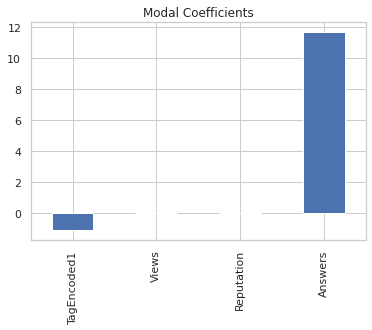

In [119]:
coef.plot(kind='bar',title='Modal Coefficients')

In [120]:
lassoReg = Lasso(alpha=0.05,normalize=True)
lassoReg.fit(X_train,y_train)
y_pred_lso=lassoReg.predict(X_test)

In [121]:
lassoReg.coef_

array([ 3.96754076e-03,  6.42333497e+00,  1.93207546e-03, -0.00000000e+00])

In [122]:
lassoReg.intercept_

28.457615187320172

In [123]:
r2=r2_score(y_test,y_pred_lso)
rmse=np.sqrt(mean_squared_error(y_test,y_pred_lso))
print(r2,'\n', rmse)

0.3544814797272977 
 228.36783977507272


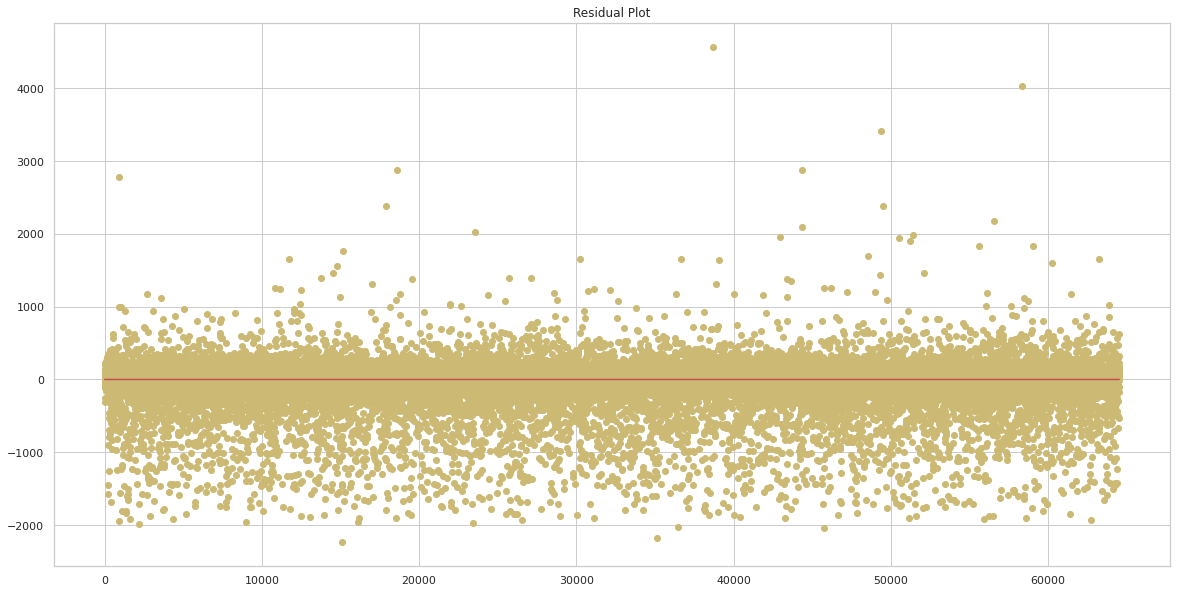

In [124]:
x=[i for i in range(1,len(y_pred)+1)]

fig= plt.figure(figsize=(20,10))
x_plot=plt.scatter(x,(y_pred_rig-y_test),c='y')
plt.plot(x,[0]*len(y_pred),c='r')
plt.title("Residual Plot")
plt.show()

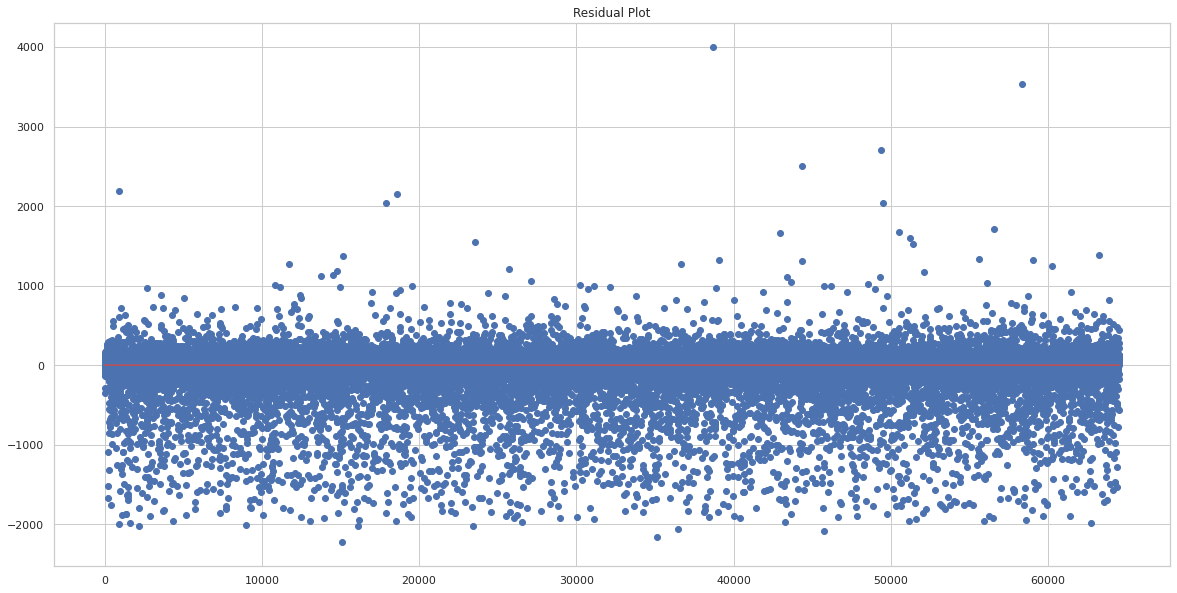

In [125]:
x=[i for i in range(1,len(y_pred)+1)]

fig= plt.figure(figsize=(20,10))
x_plot=plt.scatter(x,(y_pred_lso-y_test),c='b')
plt.plot(x,[0]*len(y_pred),c='r')
plt.title("Residual Plot")
plt.show()

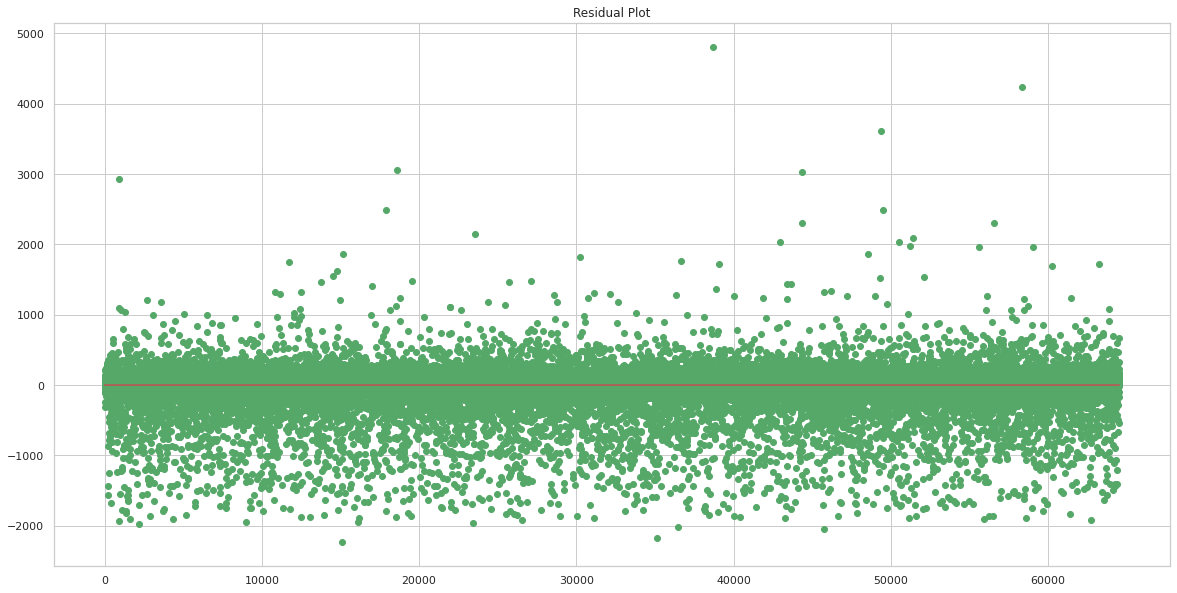

In [126]:
x=[i for i in range(1,len(y_pred)+1)]

fig= plt.figure(figsize=(20,10))
x_plot=plt.scatter(x,(y_pred-y_test),c='g')
plt.plot(x,[0]*len(y_pred),c='r')
plt.title("Residual Plot")
plt.show()

In [127]:
df.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes,TagEncoded1
0,52664,a,3942.0,2.0,155623,7855.0,42.0,0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0,0
2,468453,c,1358.0,4.0,56177,8067.0,60.0,1
3,96996,a,264.0,3.0,168793,27064.0,9.0,0
4,131465,c,4271.0,4.0,112223,13986.0,83.0,1


In [128]:
X=df.drop(['ID', 'TagEncoded1', 'Upvotes'], axis=1)

In [129]:
X=pd.get_dummies(X)

In [130]:
X.head()

,Reputation,Answers,Username,Views,Tag_a,Tag_c,Tag_h,Tag_i,Tag_j,Tag_o,Tag_p,Tag_r,Tag_s,Tag_x
0,3942.0,2.0,155623,7855.0,1,0,0,0,0,0,0,0,0,0
1,26046.0,12.0,21781,55801.0,1,0,0,0,0,0,0,0,0,0
2,1358.0,4.0,56177,8067.0,0,1,0,0,0,0,0,0,0,0
3,264.0,3.0,168793,27064.0,1,0,0,0,0,0,0,0,0,0
4,4271.0,4.0,112223,13986.0,0,1,0,0,0,0,0,0,0,0


In [131]:
Y=df['Upvotes']
len(Y)

330045

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [133]:
y_pred = reg.predict(X_test)

In [134]:
reg.coef_

array([ 3.44990072e-02, -3.73962619e+01, -2.61400315e-04,  2.02198025e-02,
       -3.21690751e+01, -7.79567702e+01, -5.74312950e+01,  1.00884861e+02,
       -1.11644514e+02,  1.10167299e+02, -4.90931858e+01,  8.99312827e+01,
       -2.51904630e+01,  5.25018602e+01])

In [135]:
reg.intercept_

-324.4422116828412

In [136]:
from sklearn.metrics import r2_score, mean_squared_error
r2=r2_score(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print(r2,'\n', rmse)

0.3042848500464682 
 2329.9177818845747


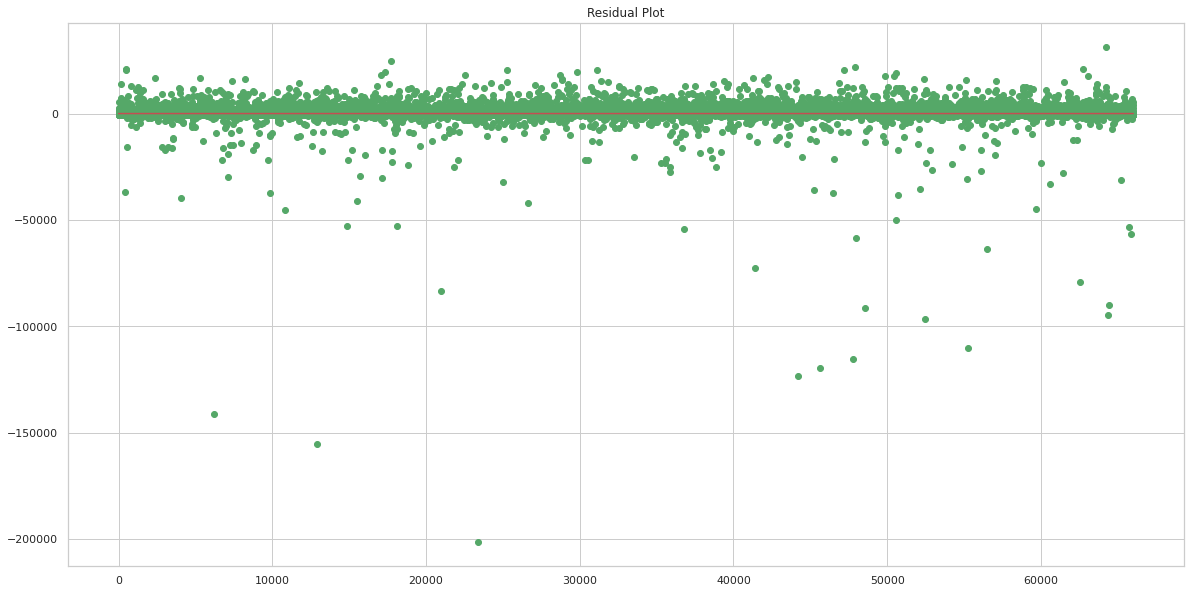

In [137]:
x=[i for i in range(1,len(y_pred)+1)]

fig= plt.figure(figsize=(20,10))
x_plot=plt.scatter(x,(y_pred-y_test),c='g')
plt.plot(x,[0]*len(y_pred),c='r')
plt.title("Residual Plot")
plt.show()

In [138]:
y1=pd.DataFrame(Y)
y1.head()

,Upvotes
0,42.0
1,1175.0
2,60.0
3,9.0
4,83.0


In [139]:
Z=pd.DataFrame()
Z=X
# Z.append(Y)
Z.head()

,Reputation,Answers,Username,Views,Tag_a,Tag_c,Tag_h,Tag_i,Tag_j,Tag_o,Tag_p,Tag_r,Tag_s,Tag_x
0,3942.0,2.0,155623,7855.0,1,0,0,0,0,0,0,0,0,0
1,26046.0,12.0,21781,55801.0,1,0,0,0,0,0,0,0,0,0
2,1358.0,4.0,56177,8067.0,0,1,0,0,0,0,0,0,0,0
3,264.0,3.0,168793,27064.0,1,0,0,0,0,0,0,0,0,0
4,4271.0,4.0,112223,13986.0,0,1,0,0,0,0,0,0,0,0


In [140]:
Z=pd.concat([Z,y1],axis=1)

In [141]:
from scipy import stats
z = np.abs(stats.zscore(Z))
print(z)

[[0.14157253 0.53573597 1.5072655  ... 0.27575268 0.14696678 0.08225766]
 [0.67523751 2.25794312 1.21226978 ... 0.27575268 0.14696678 0.23312725]
 [0.23705919 0.02299985 0.51337753 ... 0.27575268 0.14696678 0.07724713]
 ...
 [0.05894553 0.53573597 0.20843454 ... 0.27575268 0.14696678 0.08977345]
 [0.2839526  0.53573597 0.0243399  ... 0.27575268 0.14696678 0.09311381]
 [0.21329838 0.02299985 1.48834852 ... 0.27575268 0.14696678 0.08364947]]


In [142]:
Q1 = Z.quantile(0.48)
Q3 = Z.quantile(.99)
IQR = Q3 - Q1
print(IQR)

Reputation    112820.00
Answers           15.00
Username       97907.00
Views         308667.04
Tag_a              1.00
Tag_c              1.00
Tag_h              1.00
Tag_i              1.00
Tag_j              1.00
Tag_o              1.00
Tag_p              1.00
Tag_r              1.00
Tag_s              1.00
Tag_x              1.00
Upvotes         5005.00
dtype: float64


In [143]:
Z1=Z[(Z < (Q1 - 1.5 * IQR)) | (Z > (Q3 + 1.5 * IQR)) == True]

In [144]:
for col in Z1.columns:
  Z2=Z[Z1[col].notna()==True]
Z2.head()

,Reputation,Answers,Username,Views,Tag_a,Tag_c,Tag_h,Tag_i,Tag_j,Tag_o,Tag_p,Tag_r,Tag_s,Tag_x,Upvotes
95,19027.0,41.0,23334,752007.0,0,0,0,0,1,0,0,0,0,0,12565.0
208,93269.0,17.0,71012,123787.0,0,0,0,0,1,0,0,0,0,0,17598.0
318,139905.0,8.0,171265,162004.0,0,0,0,0,1,0,0,0,0,0,12647.0
984,113925.0,18.0,113835,259437.0,0,0,0,0,0,0,1,0,0,0,45392.0
1071,33569.0,20.0,9943,424260.0,0,1,0,0,0,0,0,0,0,0,14814.0


In [145]:
Z3=Z.drop(Z2.index)
Z3.head()

,Reputation,Answers,Username,Views,Tag_a,Tag_c,Tag_h,Tag_i,Tag_j,Tag_o,Tag_p,Tag_r,Tag_s,Tag_x,Upvotes
0,3942.0,2.0,155623,7855.0,1,0,0,0,0,0,0,0,0,0,42.0
1,26046.0,12.0,21781,55801.0,1,0,0,0,0,0,0,0,0,0,1175.0
2,1358.0,4.0,56177,8067.0,0,1,0,0,0,0,0,0,0,0,60.0
3,264.0,3.0,168793,27064.0,1,0,0,0,0,0,0,0,0,0,9.0
4,4271.0,4.0,112223,13986.0,0,1,0,0,0,0,0,0,0,0,83.0


In [146]:
len(Z2)/len(Z)

0.0034510445545304427

In [147]:
X=Z3.drop('Upvotes',axis=1)
Y=Z3['Upvotes']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [148]:
y_pred=reg.predict(X_test)

In [149]:
reg.coef_

array([ 1.22708364e-02,  1.72083947e+01, -2.46287347e-04,  5.59401968e-03,
       -4.83236912e+00, -2.09738786e+00, -1.72400238e-01, -9.14328761e+00,
        1.39078276e+01, -1.57258997e+00,  2.05353359e-01,  2.90555182e+00,
       -9.90129281e+00,  1.07005948e+01])

In [150]:
reg.intercept_

-77.79893042940901

In [151]:
r2=r2_score(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print(r2,'\n', rmse)

0.3869832603582912 
 612.6485657457038


In [152]:
ridgeReg.fit(X_train,y_train)
y_pred_rig=ridgeReg.predict(X_test)
print(ridgeReg.coef_, '\n', ridgeReg.intercept_, '\n')
r2=r2_score(y_test,y_pred_rig)
rmse=np.sqrt(mean_squared_error(y_test,y_pred_rig))
print(r2,'\n', rmse)

[ 1.16671187e-02  1.93893032e+01 -2.44041875e-04  5.26475666e-03
 -5.86876497e+00 -1.71286426e+00  4.89870239e-01 -1.36885097e+01
  1.61521390e+01 -6.31788806e+00  5.41573289e-01 -2.73547681e-01
 -1.09183679e+01  7.86752068e+00] 
 -72.55746173970331 

0.3870668168468111 
 612.6068111703127


In [153]:
from sklearn.linear_model import  Lasso
lassoReg=Lasso(alpha=0.01, normalize=True)
lassoReg.fit(X_train,y_train)
y_pred_lso=lassoReg.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test,y_pred_lso))
r2=r2_score(y_test,y_pred_lso)
print(r2,rmse)
print(lassoReg.intercept_, '\n\n', lassoReg.coef_)

0.38699951247523023 612.6404445138653
-80.24780103278366 

 [ 1.20812171e-02  1.62910509e+01 -1.44273536e-04  5.54528454e-03
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  5.60098595e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00]


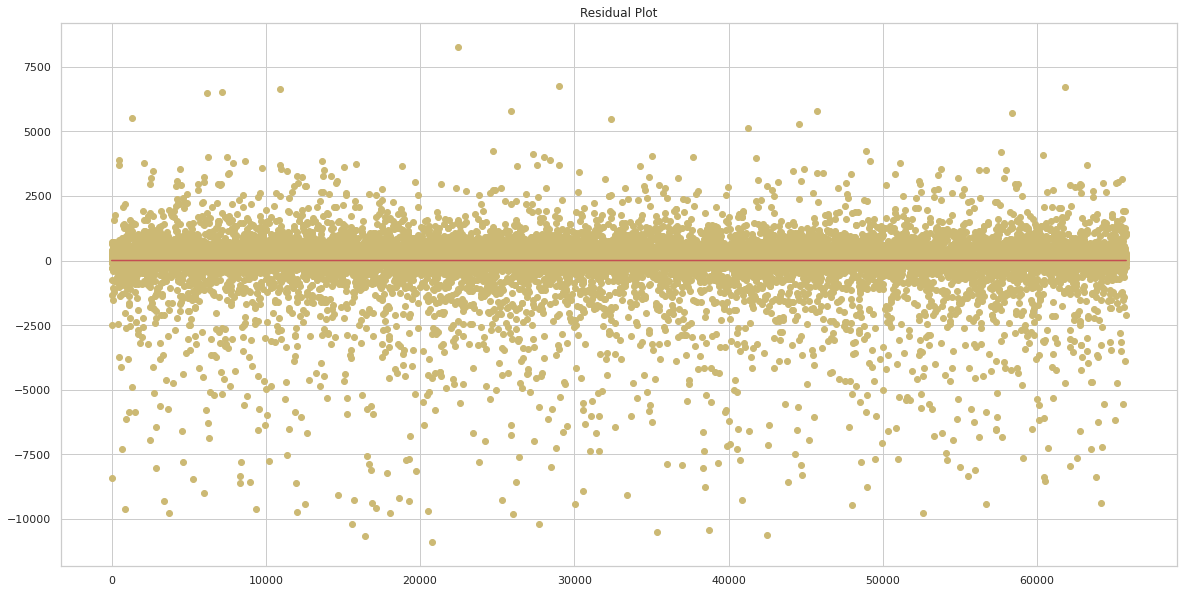

In [154]:
x=[i for i in range(1,len(y_pred)+1)]

fig= plt.figure(figsize=(20,10))
x_plot=plt.scatter(x,(y_pred_rig-y_test),c='y')
plt.plot(x,[0]*len(y_pred),c='r')
plt.title("Residual Plot")
plt.show()

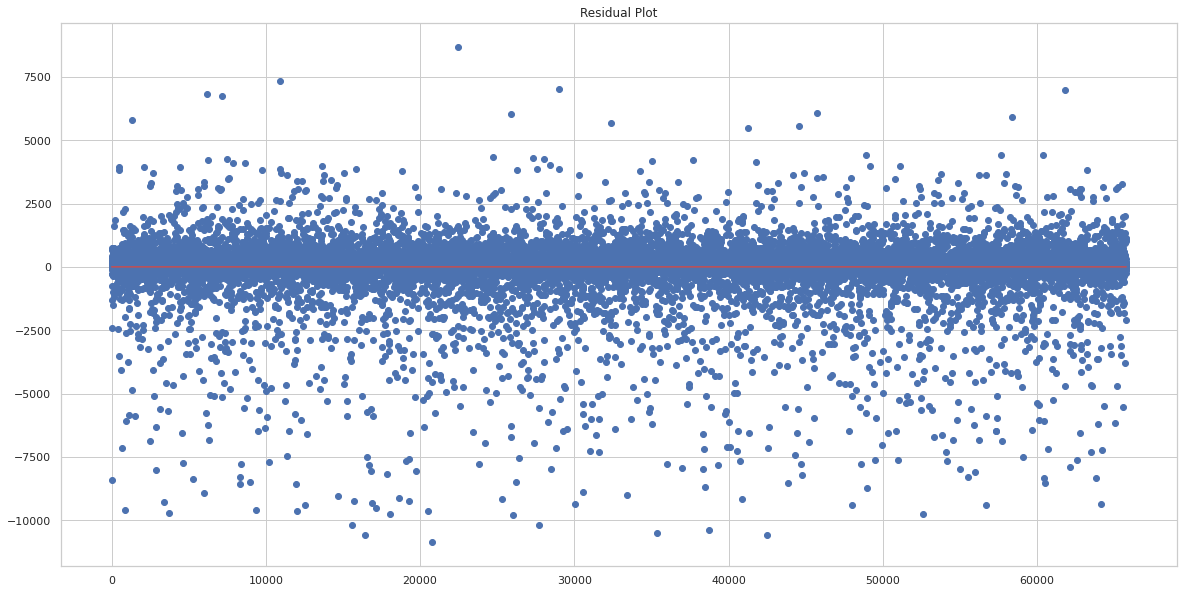

In [155]:
x=[i for i in range(1,len(y_pred)+1)]

fig= plt.figure(figsize=(20,10))
x_plot=plt.scatter(x,(y_pred_lso-y_test),c='b')
plt.plot(x,[0]*len(y_pred),c='r')
plt.title("Residual Plot")
plt.show()

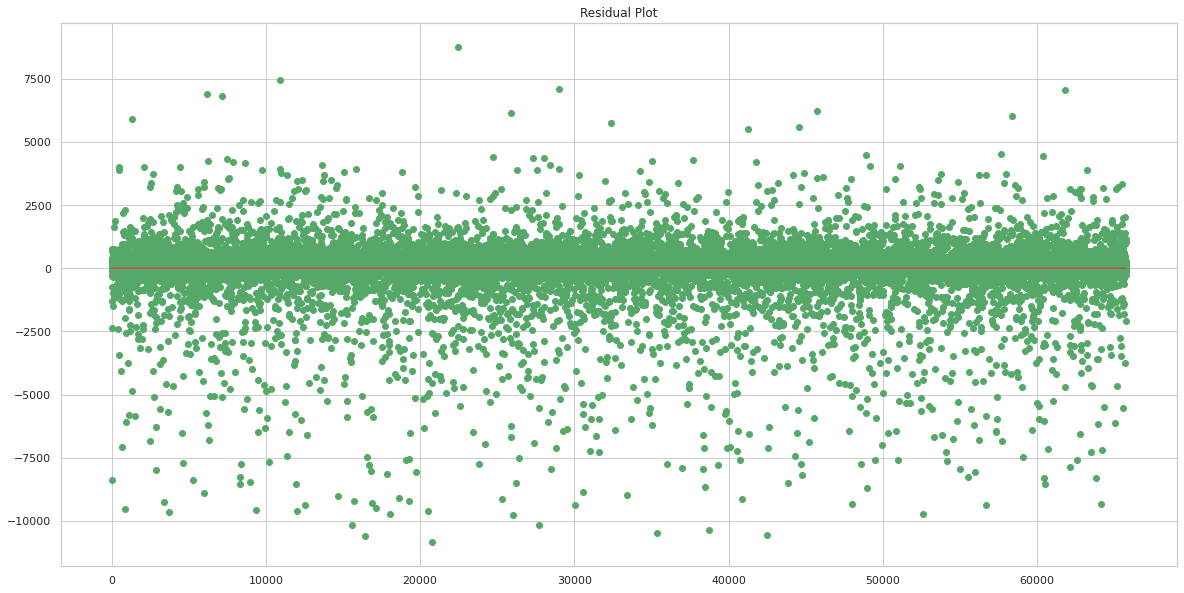

In [156]:
x=[i for i in range(1,len(y_pred)+1)]

fig= plt.figure(figsize=(20,10))
x_plot=plt.scatter(x,(y_pred-y_test),c='g')
plt.plot(x,[0]*len(y_pred),c='r')
plt.title("Residual Plot")
plt.show()

In [157]:
df1.head()

,ID,Tag,Reputation,Answers,Username,Views,TagEncoded1
0,366953,a,5645.0,3.0,50652,33200.0,0
1,71864,c,24511.0,6.0,37685,2730.0,1
2,141692,i,927.0,1.0,135293,21167.0,3
3,316833,i,21.0,6.0,166998,18528.0,3
4,440445,i,4475.0,10.0,53504,57240.0,3


In [158]:
df11=df1.drop(['ID', 'TagEncoded1'], axis=1)

In [159]:
Xpredict=pd.get_dummies(df11)

In [160]:
Ypredict=ridgeReg.predict(Xpredict)

In [161]:
Ypredict

array([208.03128024, 333.21430784,  22.3806977 , ..., 301.11637421,
        13.82094564,  10.27174526])

In [162]:
df1=df1.drop('TagEncoded1',axis=1)

In [163]:
df1['Upvotes_predicted']=Ypredict

In [164]:
df1.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes_predicted
0,366953,a,5645.0,3.0,50652,33200.0,208.031280
1,71864,c,24511.0,6.0,37685,2730.0,333.214308
2,141692,i,927.0,1.0,135293,21167.0,22.380698
3,316833,i,21.0,6.0,166998,18528.0,87.125764
4,440445,i,4475.0,10.0,53504,57240.0,448.154872


In [165]:
import math
def intgr(a):
  if (a-math.floor(a))<0.5:
    return math.floor(a)
  else:
    return math.ceil(a)

df1['Upvotes_predicted_in_integer']=df1['Upvotes_predicted'].apply(intgr)
df1.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes_predicted,Upvotes_predicted_in_integer
0,366953,a,5645.0,3.0,50652,33200.0,208.031280,208
1,71864,c,24511.0,6.0,37685,2730.0,333.214308,333
2,141692,i,927.0,1.0,135293,21167.0,22.380698,22
3,316833,i,21.0,6.0,166998,18528.0,87.125764,87
4,440445,i,4475.0,10.0,53504,57240.0,448.154872,448


In [195]:
df1.to_csv('/content/predicted_Upvotes_via_LinearRegression.csv')

In [167]:
from scipy import stats
df_corr = pd.DataFrame()
df_p = pd.DataFrame() 
col=X.columns 
for x in col:
    for y in col:
        corr = stats.pearsonr(X[x], X[y])
        df_corr.loc[x,y] = corr[0]
        df_p.loc[x,y] = corr[1]

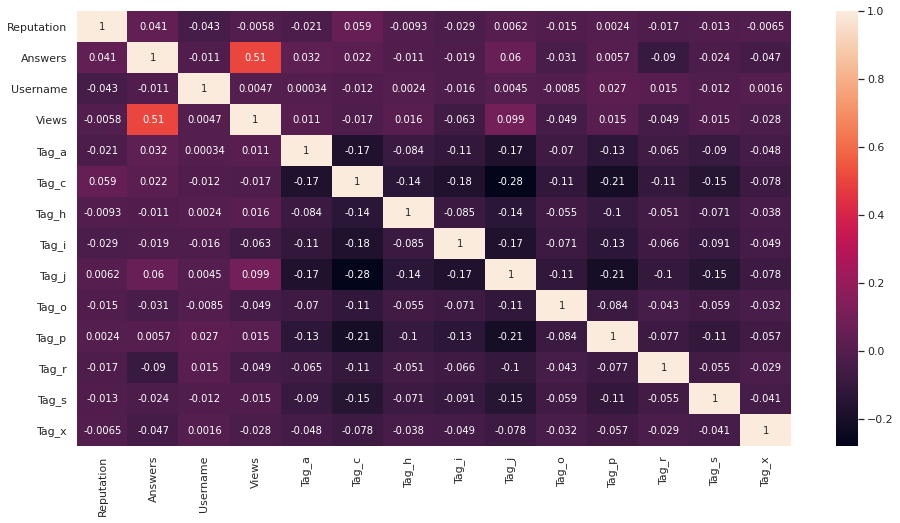

In [168]:
plt.figure(figsize=(16,8))
sns.heatmap(df_corr,annot=True)

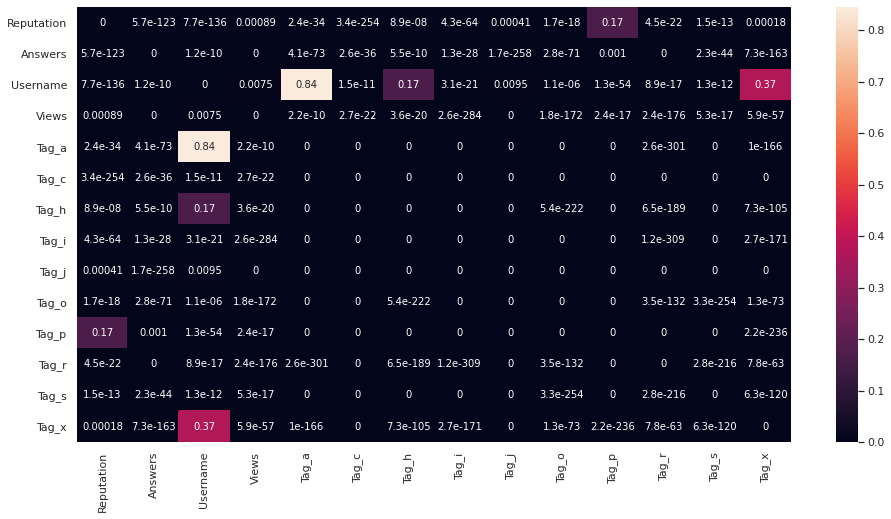

In [169]:
plt.figure(figsize=(16,8))
sns.heatmap(df_p,annot=True)

In [170]:
df_corr

,Reputation,Answers,Username,Views,Tag_a,Tag_c,Tag_h,Tag_i,Tag_j,Tag_o,Tag_p,Tag_r,Tag_s,Tag_x
Reputation,1.000000,0.041104,-0.043233,-0.005794,-0.021309,0.059329,-0.009325,-0.029467,0.006156,-0.015306,0.002391,-0.016842,-0.012885,-0.006538
Answers,0.041104,1.000000,-0.011229,0.505689,0.031529,0.021941,-0.010817,-0.019346,0.059833,-0.031120,0.005718,-0.090053,-0.024358,-0.047394
Username,-0.043233,-0.011229,1.000000,0.004663,0.000341,-0.011763,0.002394,-0.016494,0.004524,-0.008488,0.027130,0.014504,-0.012374,0.001556
Views,-0.005794,0.505689,0.004663,1.000000,0.011066,-0.016935,0.016039,-0.062767,0.098684,-0.048787,0.014775,-0.049340,-0.014610,-0.027727
Tag_a,-0.021309,0.031529,0.000341,0.011066,1.000000,-0.172962,-0.083992,-0.107727,-0.172259,-0.070107,-0.126734,-0.064626,-0.089924,-0.047957
Tag_c,0.059329,0.021941,-0.011763,-0.016935,-0.172962,1.000000,-0.136718,-0.175353,-0.280396,-0.114117,-0.206292,-0.105196,-0.146375,-0.078062
Tag_h,-0.009325,-0.010817,0.002394,0.016039,-0.083992,-0.136718,1.000000,-0.085153,-0.136163,-0.055416,-0.100177,-0.051084,-0.071081,-0.037907
Tag_i,-0.029467,-0.019346,-0.016494,-0.062767,-0.107727,-0.175353,-0.085153,1.000000,-0.174641,-0.071076,-0.128486,-0.065520,-0.091167,-0.048620
Tag_j,0.006156,0.059833,0.004524,0.098684,-0.172259,-0.280396,-0.136163,-0.174641,1.000000,-0.113653,-0.205454,-0.104769,-0.145780,-0.077745
Tag_o,-0.015306,-0.031120,-0.008488,-0.048787,-0.070107,-0.114117,-0.055416,-0.071076,-0.113653,1.000000,-0.083617,-0.042639,-0.059330,-0.031641


In [171]:
from sklearn.feature_selection import RFE

rfe = RFE(reg, 12)
rfe = rfe.fit(X_train,y_train)

print(rfe.support_)
print(rfe.ranking_)

[ True  True False False  True  True  True  True  True  True  True  True
  True  True]
[1 1 3 2 1 1 1 1 1 1 1 1 1 1]


In [172]:
y_Prdct=rfe.predict(X_test)
r2=r2_score(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print (r2,rmse)

0.3869832603582912 612.6485657457038


In [173]:
X_train.head()

,Reputation,Answers,Username,Views,Tag_a,Tag_c,Tag_h,Tag_i,Tag_j,Tag_o,Tag_p,Tag_r,Tag_s,Tag_x
66966,5313.0,2.0,64825,2302.0,0,0,0,0,0,1,0,0,0,0
18801,41.0,1.0,54398,6462.0,0,0,0,0,0,0,0,0,1,0
259975,897.0,3.0,162407,1496.0,0,0,0,0,0,0,1,0,0,0
187533,11042.0,2.0,57845,2632.0,0,0,0,0,0,0,0,0,1,0
82878,1272.0,1.0,94185,6828.0,0,0,0,0,1,0,0,0,0,0


In [174]:
len(X_train)

263124

In [175]:
from sklearn.tree import DecisionTreeRegressor
dsr=DecisionTreeRegressor()
dsr.fit(X_train,y_train)
y_pred1=dsr.predict(X_test)
r2=r2_score(y_test,y_pred1)
rmse=np.sqrt(mean_squared_error(y_test,y_pred1))
print (r2,rmse)

0.7752798824257576 370.93364815775845


In [192]:
from sklearn.tree import DecisionTreeRegressor
dsr=DecisionTreeRegressor(random_state=98)
dsr.fit(X_train,y_train)
y_pred1=dsr.predict(X_test)
r2=r2_score(y_test,y_pred1)
rmse=np.sqrt(mean_squared_error(y_test,y_pred1))
print (r2,rmse)

0.7829924439417737 364.5127150635609


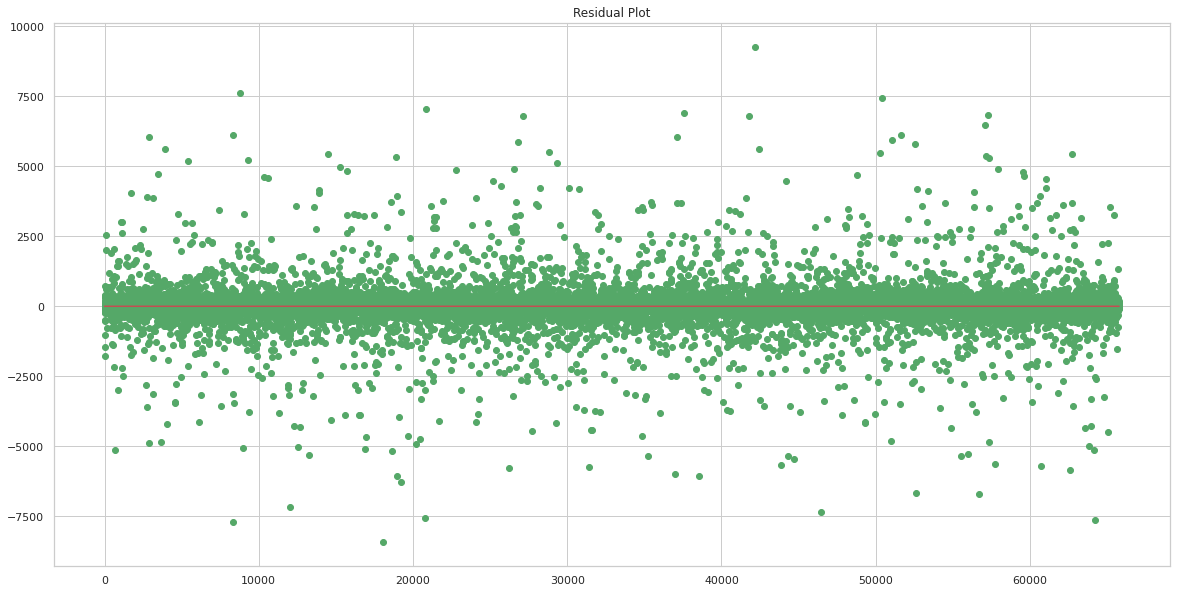

In [194]:
x=[i for i in range(1,len(y_pred)+1)]

fig= plt.figure(figsize=(20,10))
x_plot=plt.scatter(x,(y_pred1-y_test),c='g')
plt.plot(x,[0]*len(y_pred1),c='r')
plt.title("Residual Plot")
plt.show()

In [198]:
df11=df1.drop(['ID','Upvotes_predicted','Upvotes_predicted_in_integer'], axis=1)

In [199]:
Xpredict=pd.get_dummies(df11)

In [200]:
Ypredict=ridgeReg.predict(Xpredict)

In [201]:
Ypredict

array([208.03128024, 333.21430784,  22.3806977 , ..., 301.11637421,
        13.82094564,  10.27174526])

In [203]:
df1=df1.drop(['Upvotes_predicted_in_integer','Upvotes_predicted'],axis=1)

In [204]:
df1['Upvotes_predicted']=Ypredict

In [ ]:
df1.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes_predicted
0,366953,a,5645.0,3.0,50652,33200.0,208.031280
1,71864,c,24511.0,6.0,37685,2730.0,333.214308
2,141692,i,927.0,1.0,135293,21167.0,22.380698
3,316833,i,21.0,6.0,166998,18528.0,87.125764
4,440445,i,4475.0,10.0,53504,57240.0,448.154872


In [206]:
import math
def intgr(a):
  if (a-math.floor(a))<0.5:
    return math.floor(a)
  else:
    return math.ceil(a)

df1['Upvotes_predicted_in_integer']=df1['Upvotes_predicted'].apply(intgr)
df1.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes_predicted,Upvotes_predicted_in_integer
0,366953,a,5645.0,3.0,50652,33200.0,208.031280,208
1,71864,c,24511.0,6.0,37685,2730.0,333.214308,333
2,141692,i,927.0,1.0,135293,21167.0,22.380698,22
3,316833,i,21.0,6.0,166998,18528.0,87.125764,87
4,440445,i,4475.0,10.0,53504,57240.0,448.154872,448


In [208]:
df1.to_csv('/content/predicted_Upvotes_final.csv')

In [177]:
# df_1=df.drop(['Tag', 'ID'], axis=1)
# df_1.head()

In [178]:
# from scipy import stats
# df_corr = pd.DataFrame()
# df_p = pd.DataFrame() 
# col=df_1.columns 
# for x in col:
#     for y in col:
#         corr = stats.pearsonr(df_1[x], df_1[y])
#         df_corr.loc[x,y] = corr[0]
#         df_p.loc[x,y] = corr[1]

In [179]:
# plt.figure(figsize=(16,8))
# sns.heatmap(df_corr,annot=True)

In [180]:
# plt.figure(figsize=(16,8))
# sns.heatmap(df_p,annot=True)

In [181]:
# df_corr

In [182]:
# df_p

In [183]:
# X_train, X_test, y_train, y_test = train_test_split(X3, Y, test_size=0.2, random_state=0)

In [184]:
# reg = LinearRegression()
# reg.fit(X_train,y_train)

In [185]:
# reg.coef_

In [186]:
# reg.intercept_

In [187]:
# y_pred=reg.predict(X_test)

In [188]:
# from sklearn.metrics import r2_score, mean_squared_error
# r2=r2_score(y_test,y_pred)
# rmse=np.sqrt(mean_squared_error(y_test,y_pred))

In [189]:
# print(r2,'\n', rmse)

In [190]:
# df.columns

In [191]:
# X=df.drop(['ID', 'TagEncoded1', 'Upvotes'], axis=1)

In [192]:
# X=pd.get_dummies(X)

In [193]:
# X.head()

In [194]:
# import statsmodels.api as sm
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# X2=X3[X3.columns]
# vif = pd.DataFrame()
# vif["VIF Factor"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
# vif["features"] = X2.columns

In [195]:
# vif

In [196]:
# X3=X.drop('Answers', axis=1)